
# DBSCAN clustering to identify outliers

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pylab import rcParams
import seaborn as sb
import sklearn 
from sklearn.cluster import DBSCAN
from collections import Counter

from sklearn import datasets

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [14]:
address = 'Iris.csv'
df = pd.read_csv(address, header=None, sep=',')

df.columns =['Sepal_Length','Sepal_Width', 'Petal_Length', 'Petal_Width','Species']



data = df.iloc[:,0:4].values

target = df.iloc[:,4].values

df[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)


In [16]:
outlier_df = pd.DataFrame(data)
print(Counter(model.labels_))

print(outlier_df[model.labels_ == -1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

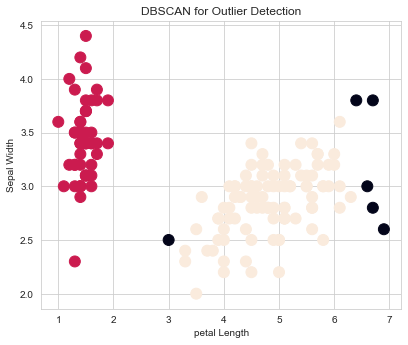

In [21]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_

ax.scatter(data[:,2], data[:,1], c=colors, s=120)

ax.set_xlabel('petal Length')
ax.set_ylabel('Sepal Width')

plt.title('DBSCAN for Outlier Detection')